


<a href="https://colab.research.google.com/github/jimmyliao/genai-gdg/blob/main/gemini-lmm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Modal LLM using Google's Gemini model for image understanding and build Retrieval Augmented Generation


## Description
In this notebook, we show how to use Google's Gemini Vision models for image understanding.

### First, we show several functions we are now supporting for Gemini:
* `complete` (both sync and async): for a single prompt and list of images
* `chat` (both sync and async): for multiple chat messages
* `stream complete` (both sync and async): for steaming output of complete
* `stream chat` (both sync and async): for steaming output of chat

### For the 2nd part of this notebook, we try to use `Gemini` + `Pydantic` to parse structured information for images from Google Maps.
* Define the desired Pydantic class with attribution fields
* Let `gemini-pro-vision` model understand each image and output structured results

### For the the 3rd part of this notebook, we propose using Gemini & LlamaIndex to build a simple `Retrieval Augmented Generation` Flow for a small Google Maps restaurant dataset.
* Build vector index based on the structured outputs from Step 2
* Using the `gemini-pro` model to synthesize the results and recommends restaurants based on user query.

Note: `google-generativeai` is only available for certain countries and regions.



- (Credit: [LlamaIndex multi_modal example](https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/examples/multi_modal/gemini.ipynb))


## Prerequisite part 1: Get Gemini API from Google AI Studio

Steps:
1. On Google AI Studio : https://makersuite.google.com/app/apikey , Click `Create API key in new project` or `Create API key in existing project`

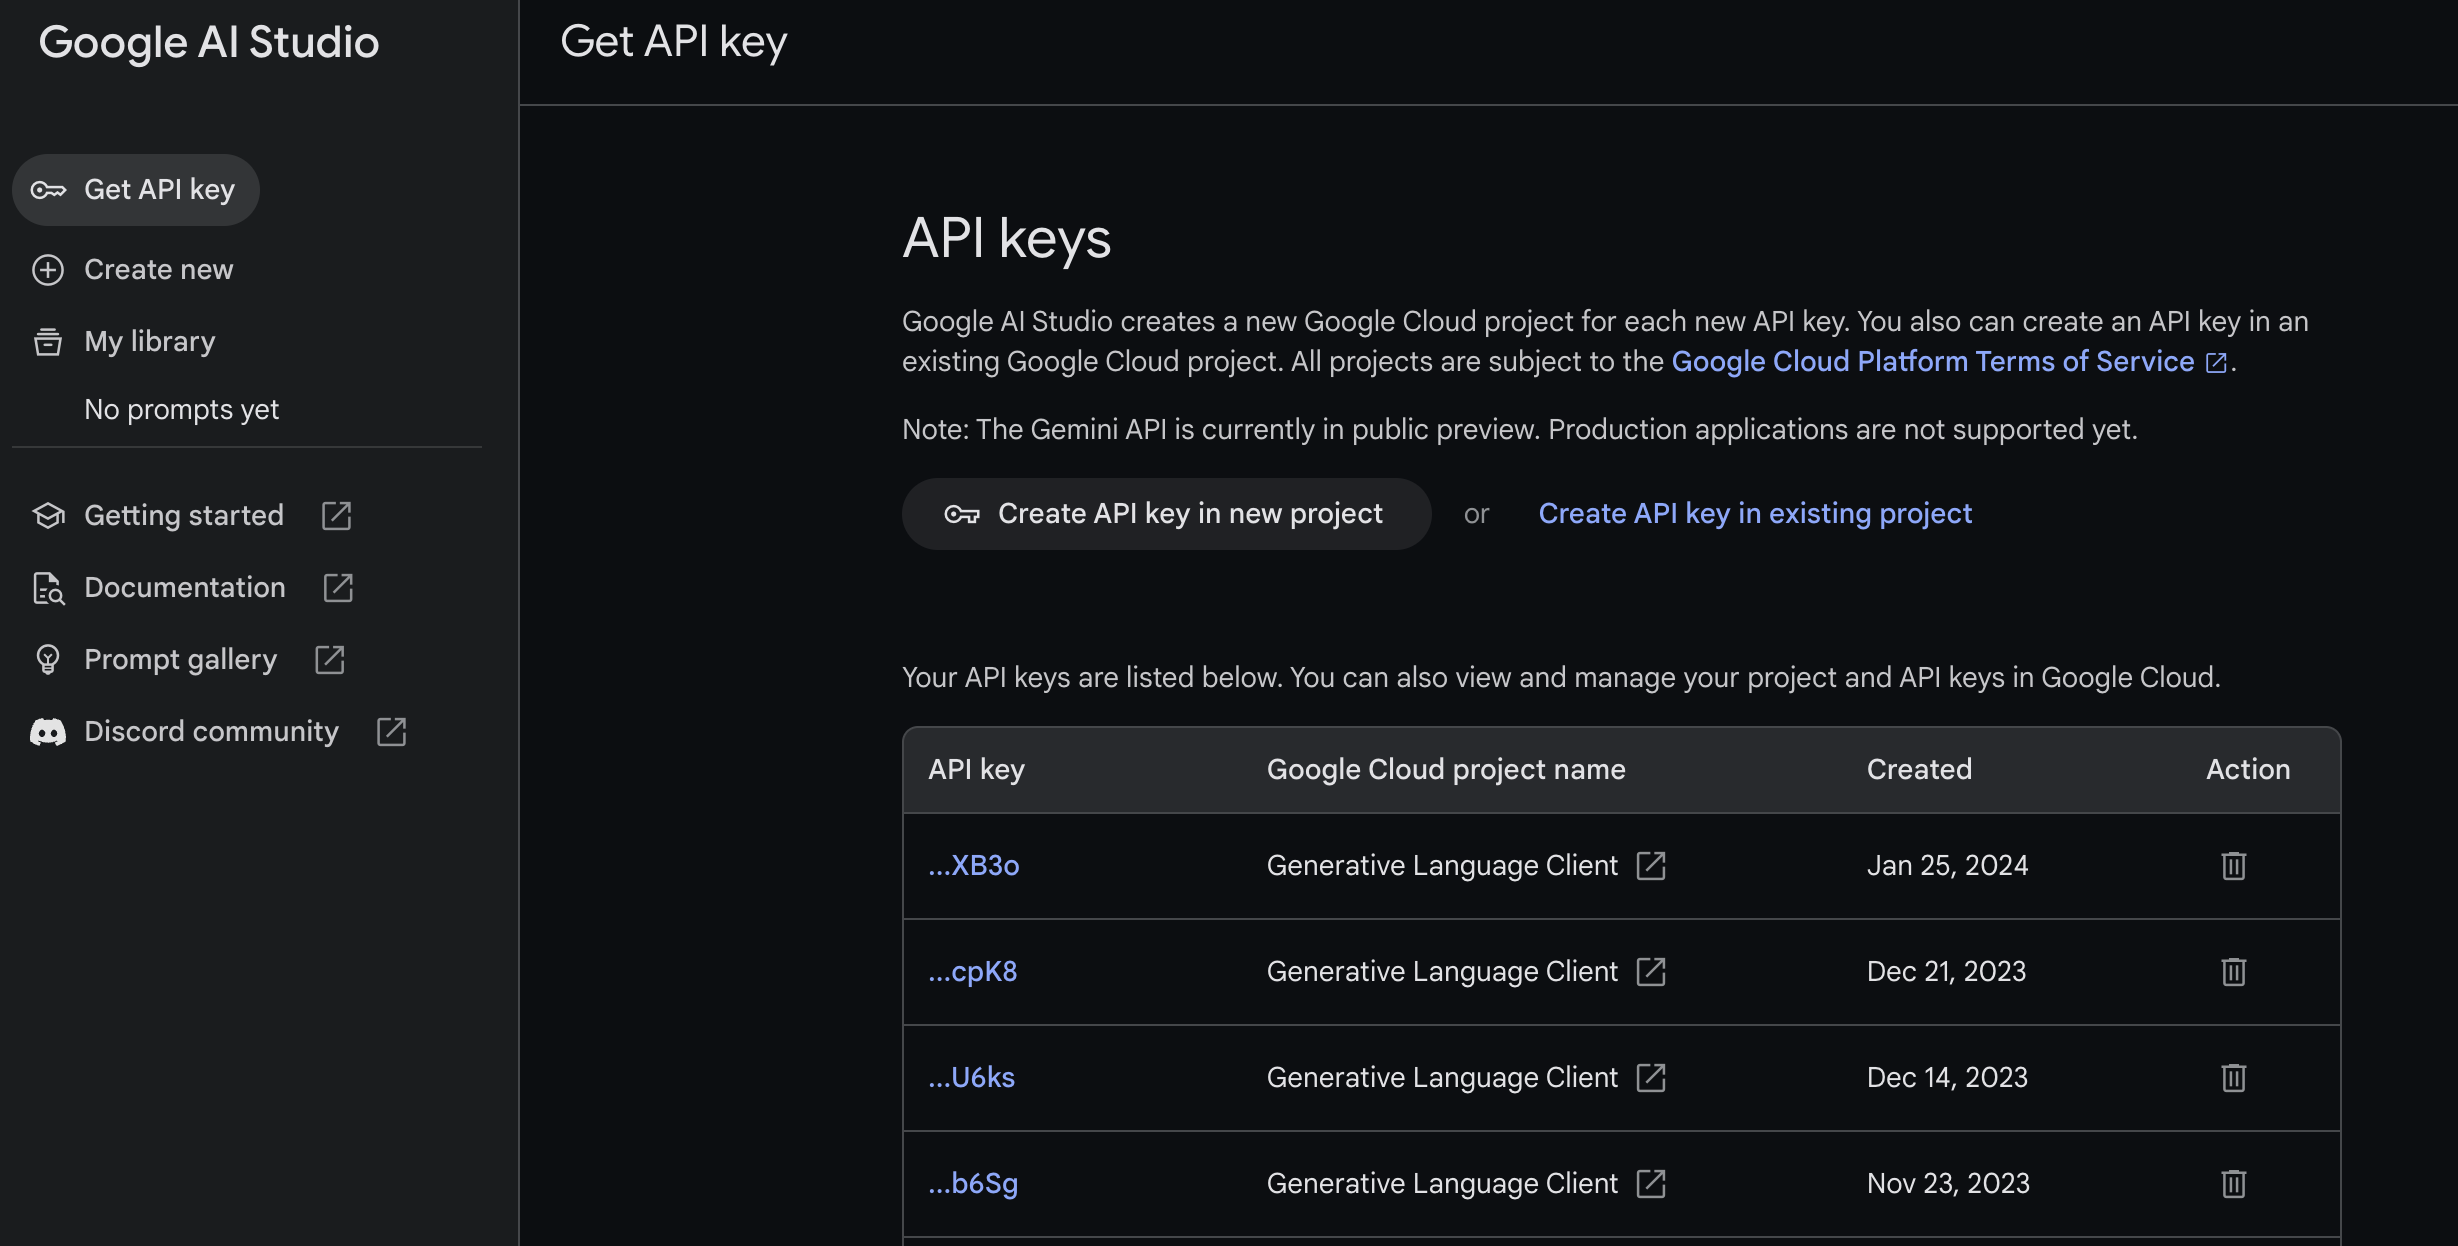


Credit: [[Golang] 透過 Google Gemini Pro 來打造一個基本功能 LLM LINE Bot](https://www.evanlin.com/til-gogle-gemini-pro-linebot/) from [EvanLin](https://www.evanlin.com/)

## Prerequisite part 2: Click `Connect` To start Runtime

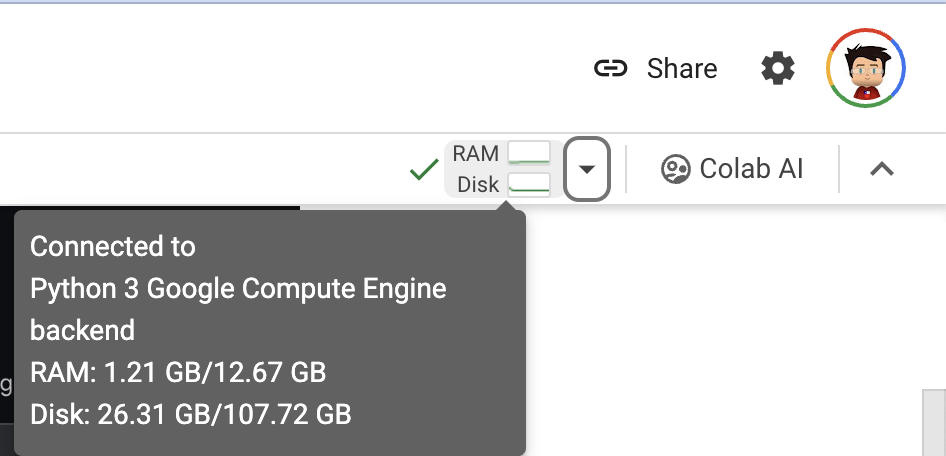


## Prerequisite part 3: Install required libraries

You may see this prompt, click `Run Anyway`

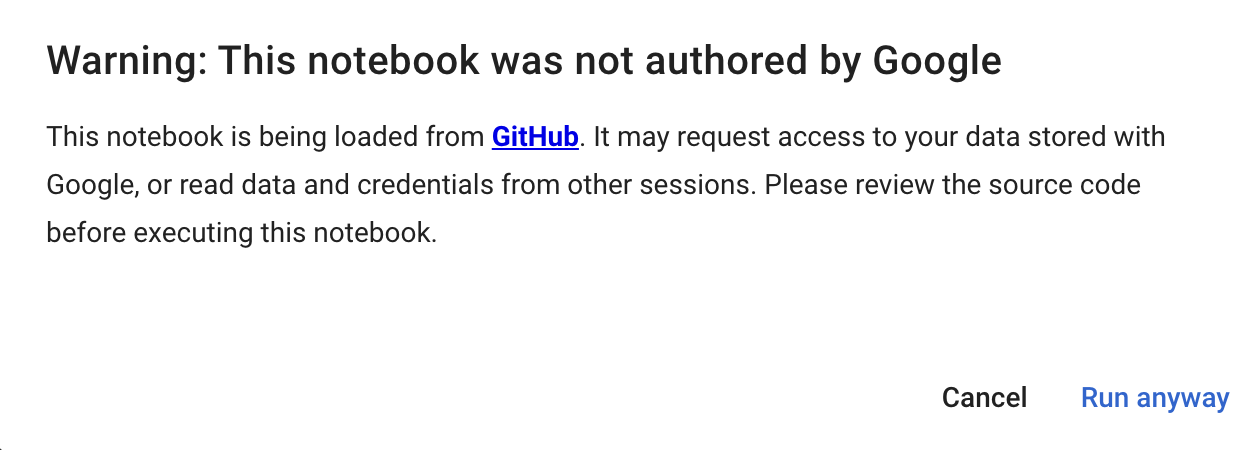

In [1]:
!pip install llama-index 'google-generativeai>=0.3.0' matplotlib qdrant_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.9/205.9 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.4/223.4 kB 26.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 93.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstal

## Prerequisite part 4: Setup GEMINI API KEY in Environment variable of Runtime

In [ ]:
%env GOOGLE_API_KEY='<GEMINI_API_KEY>'

In [ ]:
import os

GOOGLE_API_KEY = "<GEMINI_API_KEY>"  # add your GOOGLE API key here
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

##  Lab01: Use Gemini to understand Images from URLs

### Initialize `GeminiMultiModal` and Load Images from URLs

In [ ]:
from llama_index.multi_modal_llms.gemini import GeminiMultiModal

from llama_index.multi_modal_llms.generic_utils import (
    load_image_urls,
)

image_urls = [
    # "https://storage.googleapis.com/generativeai-downloads/data/scene.jpg",
    "https://docs.google.com/uc?export=download&id=12awGlu8-xlsSWJOQLEU6arBgGenvkxf9"
    # Add yours here!
]

image_documents = load_image_urls(image_urls)

gemini_pro = GeminiMultiModal(model_name="models/gemini-pro-vision")

https://docs.google.com/uc?export=download&id=12awGlu8-xlsSWJOQLEU6arBgGenvkxf9


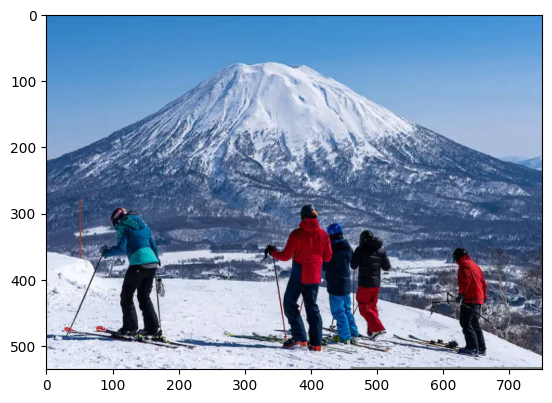

In [ ]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

img_response = requests.get(image_urls[0])
print(image_urls[0])
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)

### Complete a prompt with a bunch of images

In [ ]:
complete_response = gemini_pro.complete(
    # prompt="請指出拍攝這張照片的城市",
    prompt="Please indicate the city where this photo was taken",
    image_documents=image_documents,
)

In [ ]:
print(complete_response)

 這是日本北海道二世古町的一座滑雪勝地。


### Steam Complete a prompt with a bunch of images

In [ ]:
stream_complete_response = gemini_pro.stream_complete(
    # prompt="給我更多關於這張圖片的資訊",
    prompt="Give me more information about this image",
    image_documents=image_documents,
)

In [ ]:
for r in stream_complete_response:
    print(r.text, end="")

 圖片中的滑雪勝地是位於日本北海道的二世古。二世古以其優質的粉雪和長長的滑雪道而聞名，是日本最受歡迎的滑雪勝地之一。

## Complete with Two images

In [ ]:
image_urls = [
    "https://www.sportsnet.ca/wp-content/uploads/2023/11/CP1688996471-1040x572.jpg",
    "https://res.cloudinary.com/hello-tickets/image/upload/c_limit,f_auto,q_auto,w_1920/v1640835927/o3pfl41q7m5bj8jardk0.jpg",
    # "https://www.cleverfiles.com/howto/wp-content/uploads/2018/03/minion.jpg",
]

image_documents_1 = load_image_urls(image_urls)

response_multi = gemini_pro.complete(
    # prompt="用繁體中文回答: is there any relationship between those images?",
    prompt="is there any relationship between those images?",
    image_documents=image_documents_1,
)
print(response_multi)

 有的，他們都跟足球有關。第一張圖片是足球金球獎，頒發給在過去一年表現最出色的足球員。第二張圖片是羅馬競技場，是古羅馬時期的圓形劇場，也是世界七大奇蹟之一。足球金球獎的頒獎典禮經常在羅馬競技場舉行。


## Lab02: `Gemini` + `Pydantic` for Structured Output Parsing from an Image

* Leveraging Gemini for the image reasoning
* Use Pydantic program to generate structured output from the image reasoning results of Gemini

In [ ]:
import google.generativeai as genai

genai.configure(
    api_key=GOOGLE_API_KEY,
    client_options={"api_endpoint": "generativelanguage.googleapis.com"},
)

List available Gemini Models from `google.generativeai`.
Make sure your API key has access to belowing models

In [ ]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


### Download example images for Gemini to understand

In [ ]:
from pathlib import Path

input_image_path = Path("google_restaurants")
if not input_image_path.exists():
    Path.mkdir(input_image_path)

In [ ]:
!wget "https://docs.google.com/uc?export=download&id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg" -O ./google_restaurants/miami.png
!wget "https://docs.google.com/uc?export=download&id=1dYZy17bD6pSsEyACXx9fRMNx93ok-kTJ" -O ./google_restaurants/orlando.png
!wget "https://docs.google.com/uc?export=download&id=1ShPnYVc1iL_TA1t7ErCFEAHT74-qvMrn" -O ./google_restaurants/sf.png
!wget "https://docs.google.com/uc?export=download&id=1WjISWnatHjwL4z5VD_9o09ORWhRJuYqm" -O ./google_restaurants/toronto.png

!wget "https://docs.google.com/uc?export=download&id=14wsesUbq_pOj1xvhqqJKogwcPXvdUUhC" -O ./google_restaurants/taipei001.png
!wget "https://docs.google.com/uc?export=download&id=1now7y3RH9FuTvefe_b66Y4RVLBkZ0mDv" -O ./google_restaurants/taipei002.png
!wget "https://docs.google.com/uc?export=download&id=1lyUbzkt-JYO7NR5BVfxfZiZkOnny8pu4" -O ./google_restaurants/taipei003.png


--2023-12-29 00:53:13--  https://docs.google.com/uc?export=download&id=1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg
Resolving docs.google.com (docs.google.com)... 172.217.163.46
Connecting to docs.google.com (docs.google.com)|172.217.163.46|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3mla9upjadl18c30kgv925e6bp5oaml8/1703782350000/16146658138026472746/*/1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg?e=download&uuid=0be0cb97-ebdd-4b10-87df-3bf26cfcbacb [following]
--2023-12-29 00:53:13--  https://doc-00-5c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3mla9upjadl18c30kgv925e6bp5oaml8/1703782350000/16146658138026472746/*/1Pg04p6ss0FlBgz00noHAOAJ1EYXiosKg?e=download&uuid=0be0cb97-ebdd-4b10-87df-3bf26cfcbacb
Resolving doc-00-5c-docs.googleusercontent.com (doc-00-5c-docs.googleusercontent.com)... 142.251.42.225
Connecting to doc-00-5c-docs.googleusercontent.c

### Define the Pydantic Class for the Structured Parser

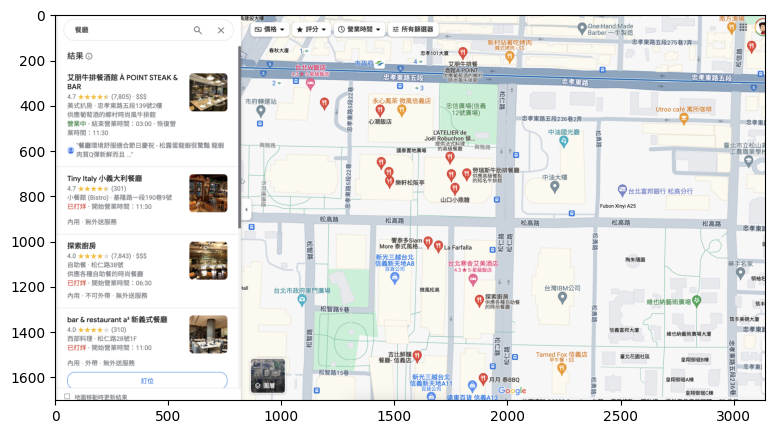

In [ ]:
from pydantic import BaseModel
from PIL import Image
import matplotlib.pyplot as plt


class GoogleRestaurant(BaseModel):
    """Data model for a Google Restaurant."""

    restaurant: str
    food: str
    location: str
    category: str
    hours: str
    price: str
    rating: float
    review: str
    description: str
    nearby_tourist_places: str


# google_image_url = "./google_restaurants/miami.png"
google_image_url = "./google_restaurants/taipei001.png"
image = Image.open(google_image_url).convert("RGB")

plt.figure(figsize=(16, 5))
plt.imshow(image)

### Call the Pydantic Program and Generate Structured Output

In [ ]:
from llama_index.multi_modal_llms import GeminiMultiModal
from llama_index.program import MultiModalLLMCompletionProgram
from llama_index.output_parsers import PydanticOutputParser

prompt_template_str = """\
    can you summarize what is in the image\
    and return the answer with json format \
"""


def pydantic_gemini(
    model_name, output_class, image_documents, prompt_template_str
):
    gemini_llm = GeminiMultiModal(
        api_key=GOOGLE_API_KEY, model_name=model_name
    )

    llm_program = MultiModalLLMCompletionProgram.from_defaults(
        output_parser=PydanticOutputParser(output_class),
        image_documents=image_documents,
        prompt_template_str=prompt_template_str,
        multi_modal_llm=gemini_llm,
        verbose=True,
    )

    response = llm_program()
    return response

### Generate the Pydantic Structured Output via Gemini Vision Model

In [ ]:
from llama_index import SimpleDirectoryReader

google_image_documents = SimpleDirectoryReader(
    "./google_restaurants"
).load_data()

results = []
for img_doc in google_image_documents:
    pydantic_response = pydantic_gemini(
        "models/gemini-pro-vision",
        GoogleRestaurant,
        [img_doc],
        prompt_template_str,
    )
    # only output the results for miami for example along with image
    if "miami" in img_doc.image_path:
        for r in pydantic_response:
            print(r)
    results.append(pydantic_response)

('restaurant', 'La Mar by Gaston Acurio')
('food', 'South American')
('location', '500 Brickell Key Dr, Miami, FL 33131')
('category', 'Restaurant')
('hours', 'Open ⋅ Closes 11 PM')
('price', 'Moderate')
('rating', 4.4)
('review', '4.4 (2,104)')
('description', 'Chic waterfront find offering Peruvian & fusion fare, plus bars for cocktails, ceviche & anticucho.')
('nearby_tourist_places', 'Brickell Key Park')


`Observation`:
* Gemini perfectly generates all the meta information we need for the Pydantic class
* It could also recognizes the nearby park from `Google Maps`

## Lab03: Build Multi-Modal RAG for Restaurant Recommendation

Our stack consists of Gemini + LlamaIndex + Pydantic structured output capabilities

### Construct Text Nodes for Building Vector Store. Store metadata and description for each restaurant.

In [ ]:
from llama_index.schema import TextNode

nodes = []
for res in results:
    text_node = TextNode()
    metadata = {}
    for r in res:
        # set description as text of TextNode
        if r[0] == "description":
            text_node.text = r[1]
        else:
            metadata[r[0]] = r[1]
    text_node.metadata = metadata
    nodes.append(text_node)

### Using Gemini Embedding for building Vector Store for Dense retrieval. Index Restaurants as nodes into Vector Store

In [ ]:
from llama_index import VectorStoreIndex, StorageContext, ServiceContext
from llama_index.embeddings import GeminiEmbedding
from llama_index.llms import Gemini
from llama_index.vector_stores import QdrantVectorStore
from llama_index import StorageContext
import qdrant_client


# Create a local Qdrant vector store
# client = qdrant_client.QdrantClient(path="qdrant_gemini_3")
client = qdrant_client.QdrantClient(path="qdrant_gemini_4")

vector_store = QdrantVectorStore(client=client, collection_name="collection")

# Using the embedding model to Gemini
embed_model = GeminiEmbedding(
    model_name="models/embedding-001", api_key=GOOGLE_API_KEY
)
service_context = ServiceContext.from_defaults(
    llm=Gemini(api_key=GOOGLE_API_KEY), embed_model=embed_model
)
storage_context = StorageContext.from_defaults(vector_store=vector_store)

index = VectorStoreIndex(
    nodes=nodes,
    service_context=service_context,
    storage_context=storage_context,
)

### Using Gemini to synthesize the results and recommend the restaurants to user

In [ ]:
# query_engine = index.as_query_engine(
#     similarity_top_k=1,
# )

# response = query_engine.query(
#     "recommend a Orlando restaurant for me and its nearby tourist places"
# )
# print(response)

The provided context does not contain any information about Orlando restaurants or nearby tourist places. Therefore, I cannot extract the requested data from the provided context.


In [ ]:
query_engine = index.as_query_engine(
    similarity_top_k=1,
)

response = query_engine.query(
    "推薦一下台北附近的餐廳"
)
print(response)

祥鈺樓海鮮酒家是一間位於台北市中山區南京東路一段137號的海鮮餐廳，鄰近捷運松江南京站，交通便利。提供多種海鮮料理，包括生魚片、壽司、烤魚、蒸魚等，價格合理，是聚餐的好去處。
